# Mall Customer Segmentation

## Technical Goals for Classifier

- Understand the data very well. Do all transformations/ Data engineering / etc. whatever applicable

- Perform Exploratory Data analysis

- Carry out all data mining task

- Identify the sailent features that will determine the best results

- Perform the evaluation to select the best algorithms


In [43]:
# import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the four dataset
df =pd.read_csv(r"C:\Users\DELL\Downloads\DS3_C6_S3_MallCustomers_Data_Project.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# checking structure

df.shape  # here 200 rows and 5 columns

(200, 5)

In [4]:
# checking data type

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# summarize data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### Data Visualization

In [6]:
# 1.) Gender count
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Interpretation: In that we have male count 88 and female count 112.

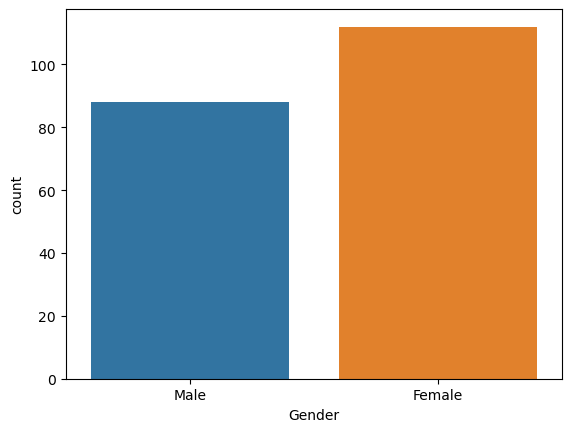

In [7]:
# 2.) Gender wise count in plot
sns.countplot(x=df.Gender,data=df)
plt.show()

Interpretation: In that we can visualize from plot female is higher compare to male.

In [8]:
# 3.) Gender wise spending score
pd.pivot_table(df,index=['Gender'], values=['Spending Score (1-100)'])

,Spending Score (1-100)
Gender,
Female,51.526786
Male,48.511364


Interpretation: In that we can see female having high spending score compare to male.

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

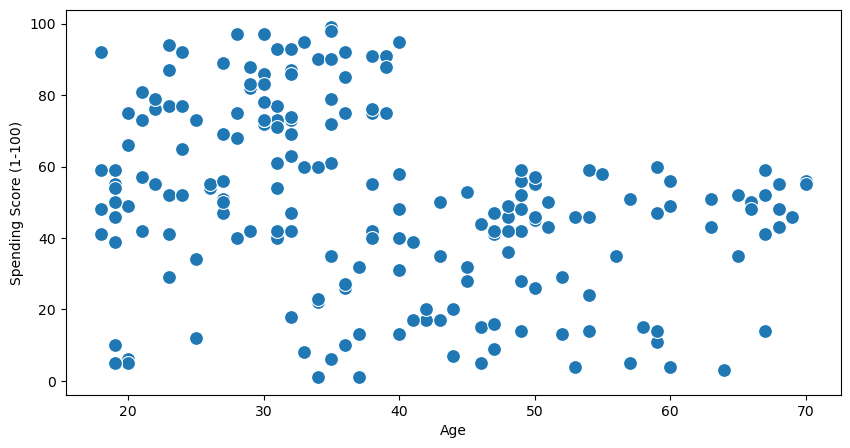

In [9]:
# 4.) Age wise spending score
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.iloc[::,-1],s=100)

Interpretation: In that we can see age Group 20 to 40 having high spending score

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

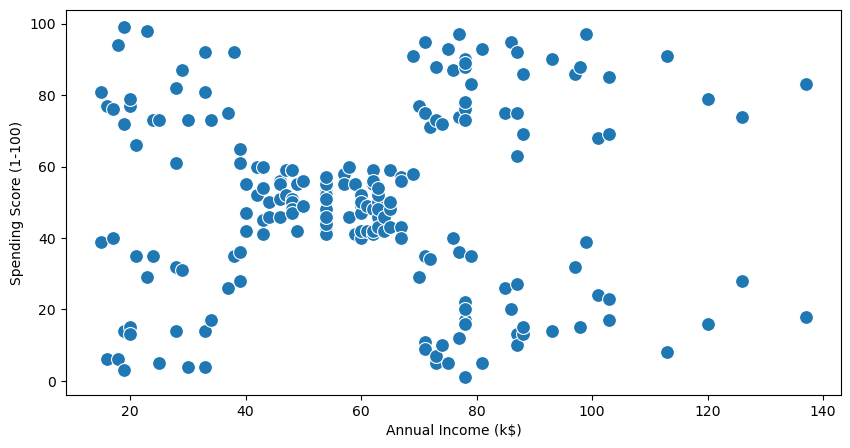

In [10]:
# 5.) spending score vs annual income

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Annual Income (k$)'],y=df.iloc[::,-1],s=100)

Interpretation

- from plot those having salary 20k to 40k and 80k 140k peoples having high spenfing score.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

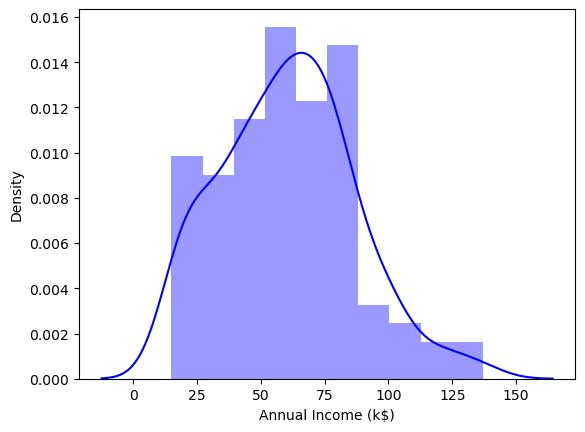

In [11]:
# 6.) Distribution of Annual Income

sns.distplot(df["Annual Income (k$)"],color="blue")

Interpretation: from plot we can see that most of the people income falls between 50k to 85K

#### Feature Transform

In [12]:
# now convert object into numerical
# apply label encoder for that

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
# now we can in data set object convert to numerical and Male-1, Female-0.

In [15]:
# checking null values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# there no null value persent in dataset

In [17]:
df.sample(5)  # checking any random 5 dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,96,1,24,60,52
81,82,1,38,54,55
181,182,0,32,97,86
138,139,1,19,74,10
97,98,0,27,60,50


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [19]:
# from info() we can see all information about dataset as like memory usage was 7.2 KB

In [20]:
# create training data
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
# scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X=sc.fit_transform(X)

In [22]:
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

### elbow method

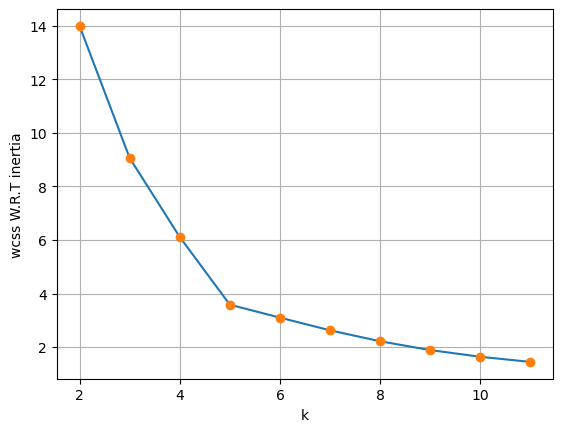

In [23]:
# computing elbow method

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



wcss=[]
for k in range(2,12):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,12),wcss)
plt.plot(range(2,12),wcss,"o")
plt.grid(True)
plt.xlabel('k')
plt.ylabel('wcss W.R.T inertia')
plt.show()

Interpretation: from visualization we can assume that k=5 will be good value

For n_clusters = 3 The average silhouette_score is : 0.4514909309424474
For n_clusters = 4 The average silhouette_score is : 0.49620078745146784
For n_clusters = 5 The average silhouette_score is : 0.5594854531227246
For n_clusters = 6 The average silhouette_score is : 0.5354954062577636
For n_clusters = 7 The average silhouette_score is : 0.5168021892187427
For n_clusters = 8 The average silhouette_score is : 0.4361422045395919
For n_clusters = 9 The average silhouette_score is : 0.4416331298338993
For n_clusters = 10 The average silhouette_score is : 0.44608884983939506
For n_clusters = 11 The average silhouette_score is : 0.44703286317582425


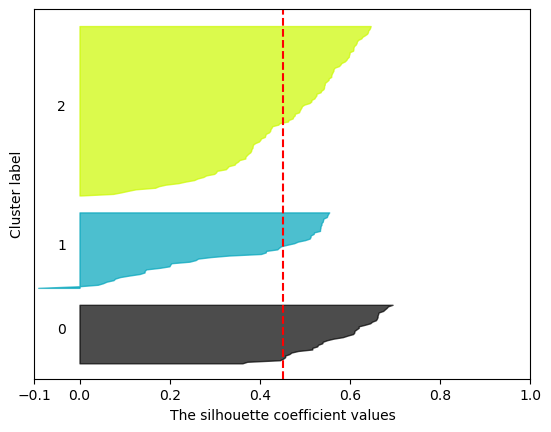

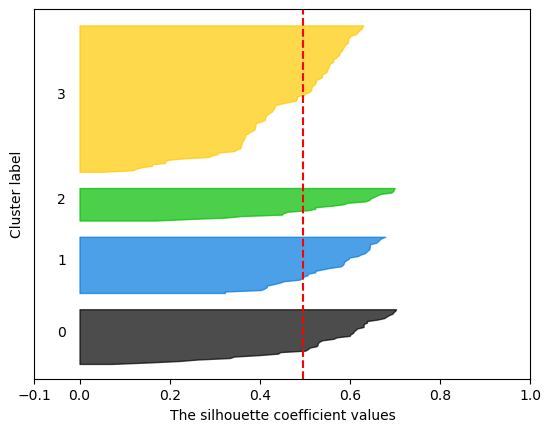

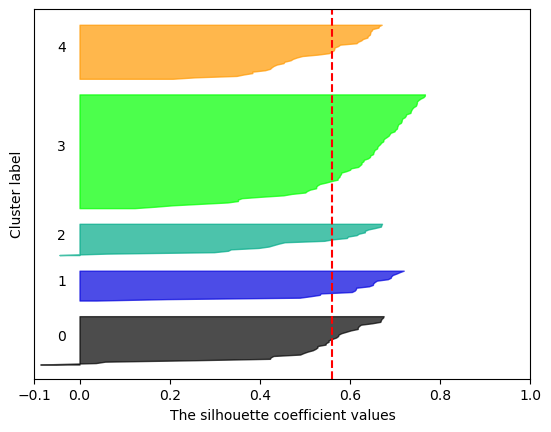

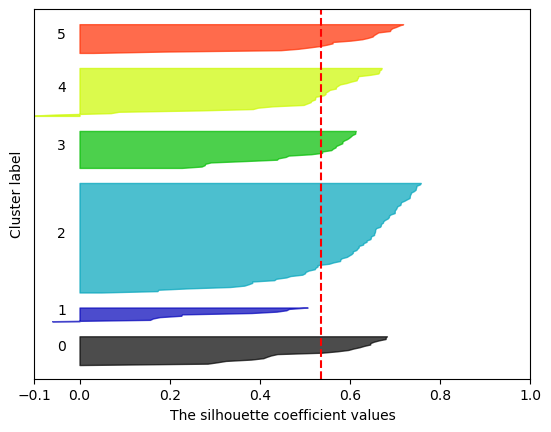

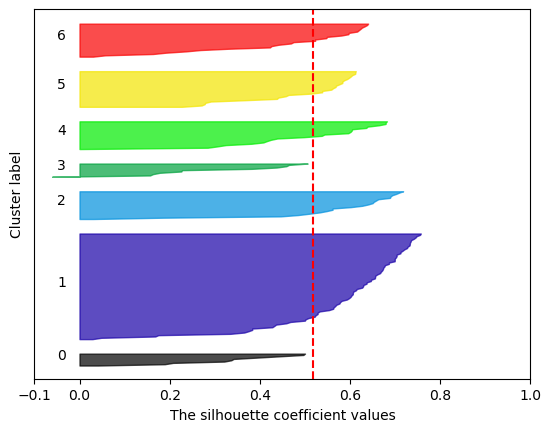

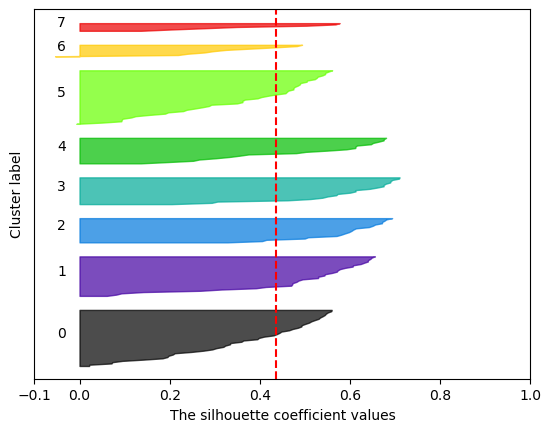

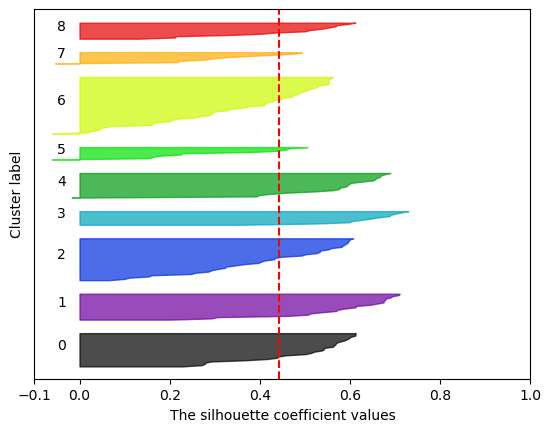

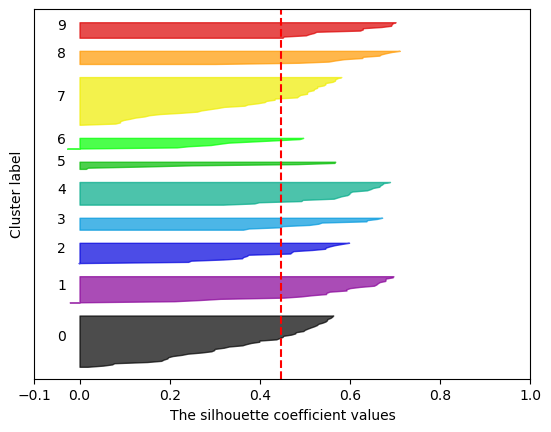

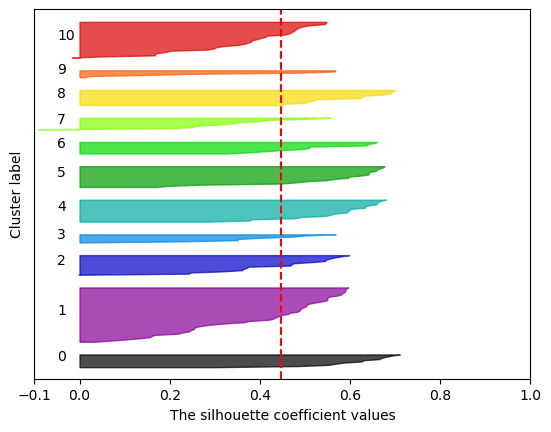

In [24]:
# compute silhouette method
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import numpy as np
range_n_clusters = [ 3, 4, 5, 6, 7,8,9,10,11]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
 # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

Interpretation: from visualization we can see that maximum silhoutte score was n_cluster =5.

In [25]:
# train model for cluster = 5
Kmeans_model_5= KMeans(n_clusters=5)
Kmeans_model_5.fit(X) # fiting training data into model

KMeans(n_clusters=5)

In [26]:
y_pr=Kmeans_model_5.predict(X)
y_pr

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0,
       2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [27]:
#centroid
cluster_centroid_5=Kmeans_model_5.cluster_centers_
cluster_centroid_5

array([[0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.33029751, 0.49508692],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149]])

In [28]:
# labels
labels_5 = Kmeans_model_5.labels_
labels_5

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0,
       2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

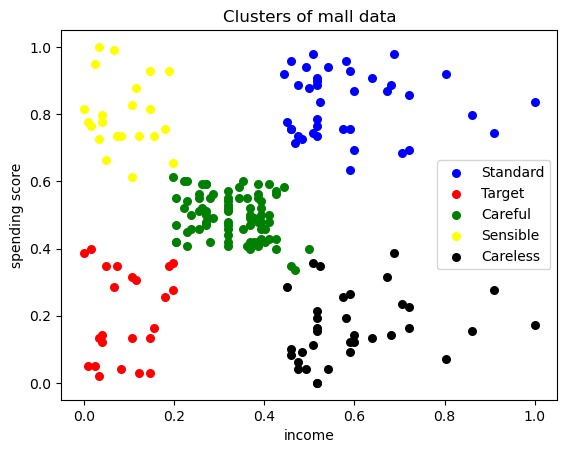

In [29]:
# plotting scatter plot
plt.scatter(X[y_pr==0,0],X[y_pr==0,1],s=30,c='blue',label='Standard')
plt.scatter(X[y_pr==1,0],X[y_pr==1,1],s=30,c='red',label='Target')
plt.scatter(X[y_pr==2,0],X[y_pr==2,1],s=30,c='green',label='Careful')
plt.scatter(X[y_pr==3,0],X[y_pr==3,1],s=30,c='yellow',label='Sensible')
plt.scatter(X[y_pr==4,0],X[y_pr==4,1],s=30,c='black',label='Careless')

plt.title('Clusters of mall data')
plt.xlabel('income')
plt.ylabel('spending score')
plt.legend()
plt.show()

Interpretation: 
- so, we used kmeans clustering from scatter plot we can see clearly 5 cluster and almost all the cluster have similar density.


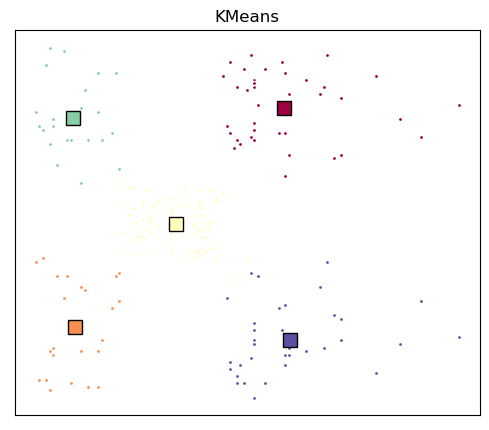

In [30]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 5))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels_5))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,5], [0, -1], [2, -3], [1, 2], [5,2]])), colors):
    my_members = (labels_5 == k)

    # Define the centroid, or cluster center.
    cluster_centroid = cluster_centroid_5[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1],'w', markerfacecolor=col, marker='.')
    
    #plot centroid
    ax.plot(cluster_centroid[0],cluster_centroid[1], marker='s', markerfacecolor=col, markeredgecolor='k', markersize=10)
    
# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

#### Agglomerative Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering

hararchy_model=AgglomerativeClustering(n_clusters=5,linkage="ward",affinity="euclidean")
hararchy_model.fit(X)

AgglomerativeClustering(n_clusters=5)

In [32]:
hararchy_label=hararchy_model.labels_
hararchy_label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

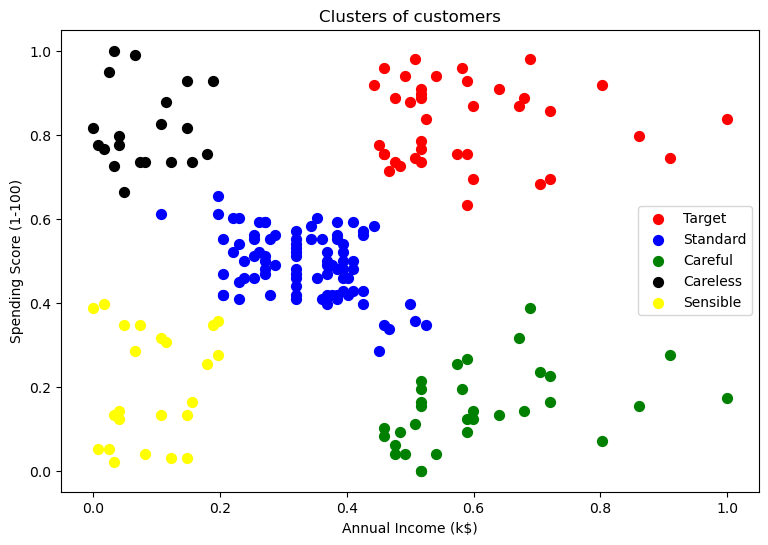

In [33]:
plt.figure(figsize=(9, 6))

plt.scatter(X[hararchy_label==0,0],X[hararchy_label==0,1],s=50,c = 'red', label = 'Target')
plt.scatter(X[hararchy_label==1,0],X[hararchy_label==1,1],s=50,c = 'blue', label = 'Standard')
plt.scatter(X[hararchy_label==2,0],X[hararchy_label==2,1],s=50,c = 'green', label = 'Careful')
plt.scatter(X[hararchy_label==3,0],X[hararchy_label==3,1],s=50,c = 'black', label = 'Careless')
plt.scatter(X[hararchy_label==4,0],X[hararchy_label==4,1],s=50,c = 'yellow', label = 'Sensible')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Interpretation: We can see 5 distinct clusters after performing agglomerative clustering on the mall customer segmentation dataset. 

#### DBSCAN

In [34]:
df1 = pd.DataFrame(X)

In [35]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df1)
distances, indices = nbrs.kneighbors(df1)


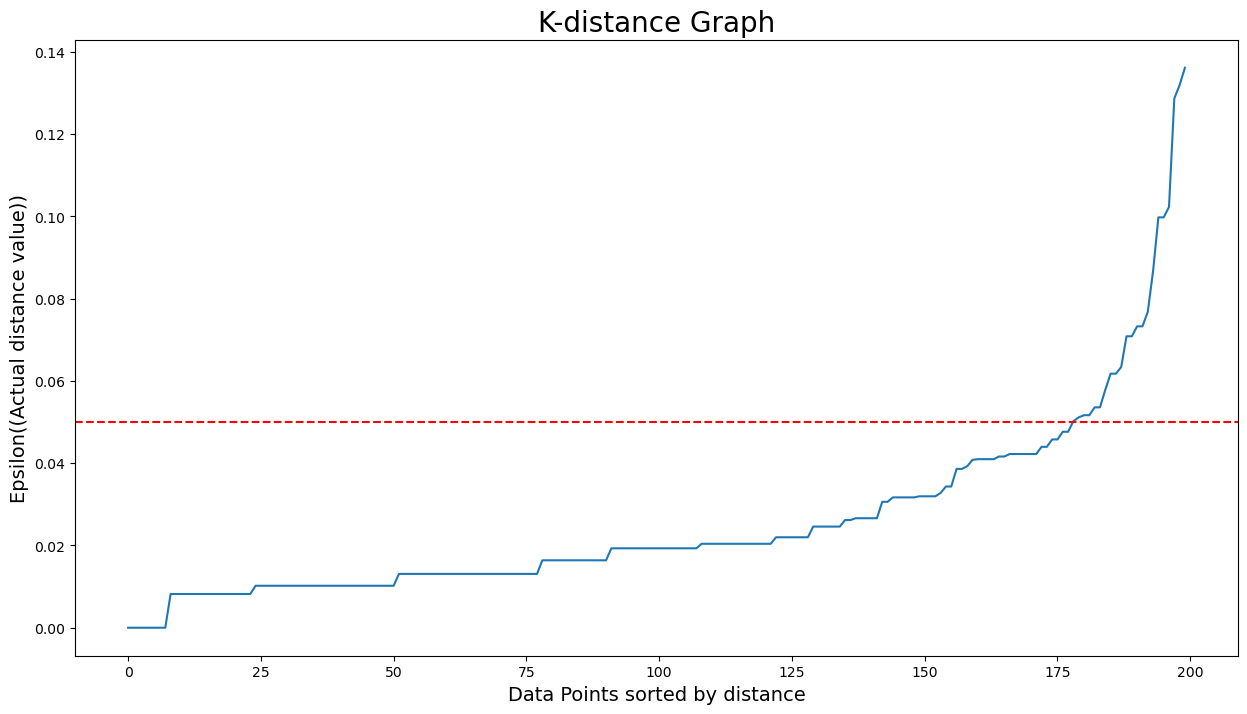

In [36]:
# k-Distance graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon((Actual distance value))',fontsize=14)
plt.show()

In [38]:
from sklearn.cluster import DBSCAN
eps_optimum=0.07
for min_samples_list in [2,4,6,8,10, 12]:
    clusterer = DBSCAN(eps=eps_optimum, min_samples=min_samples_list)
    cluster_labels = clusterer.fit_predict(df1)
    # print(clusterer_labels)
    x= cluster_labels +2    # adding +2 to get exact count
    y = np.bincount(x)
    print(y)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps_optimum,'| min_samples= ', min_samples_list, '|No of clusters obtained clustering: ', results)

[ 0 12  7 17  6  3  6  2 87 32 26  2]
eps= 0.07 | min_samples=  2 |No of clusters obtained clustering:  [(1, 12), (2, 7), (3, 17), (4, 6), (5, 3), (6, 6), (7, 2), (8, 87), (9, 32), (10, 26), (11, 2)]
[ 0 24 16  6  6  7 87 32 22]
eps= 0.07 | min_samples=  4 |No of clusters obtained clustering:  [(1, 24), (2, 16), (3, 6), (4, 6), (5, 7), (6, 87), (7, 32), (8, 22)]
[ 0 51 10  6 86 14 14 12  7]
eps= 0.07 | min_samples=  6 |No of clusters obtained clustering:  [(1, 51), (2, 10), (3, 6), (4, 86), (5, 14), (6, 14), (7, 12), (8, 7)]
[ 0 76  8 81 12 11 12]
eps= 0.07 | min_samples=  8 |No of clusters obtained clustering:  [(1, 76), (2, 8), (3, 81), (4, 12), (5, 11), (6, 12)]
[ 0 98 80 12 10]
eps= 0.07 | min_samples=  10 |No of clusters obtained clustering:  [(1, 98), (2, 80), (3, 12), (4, 10)]
[  0 121  79]
eps= 0.07 | min_samples=  12 |No of clusters obtained clustering:  [(1, 121), (2, 79)]


In [39]:
dbscan_opt = DBSCAN(eps=0.07,min_samples =8)
dbscan_opt.fit(df1)

DBSCAN(eps=0.07, min_samples=8)

In [40]:
df1["DBSCAN_opt_labels"]= dbscan_opt.labels_
df1["DBSCAN_opt_labels"].value_counts()

 1    81
-1    76
 4    12
 2    12
 3    11
 0     8
Name: DBSCAN_opt_labels, dtype: int64

Silhouette coefficient :0.760


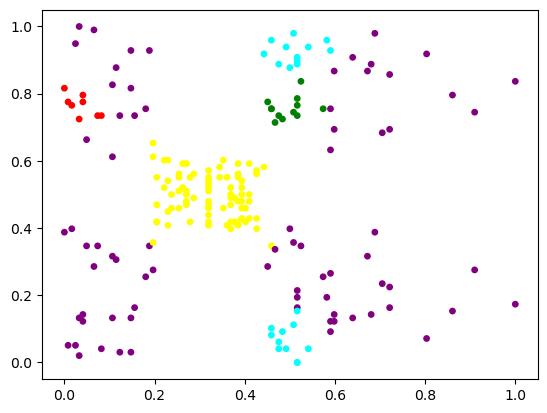

In [42]:
import matplotlib

from sklearn import metrics 
colors = [ "purple","red","yellow","green",'cyan']
plt.scatter(df1[0],df1[1],c=df1["DBSCAN_opt_labels"], cmap =matplotlib.colors.ListedColormap(colors),s= 15)
print('Silhouette coefficient :%.3f'%metrics.silhouette_score(df1,df1["DBSCAN_opt_labels"]))

Interpretation: In that we can see cluster formation was not good also noise was persent.

## Business Interpretation:

- From mall segmentation data we use 3 methods that's KMeans, Agglomerative and DBSCAN from that all KMeans and Agglomerative methods give good overview for clustering & it shows clearly 5 cluster.

- In that the yellow cluster has low income & low spending score so we can call them as sensible clients.

- the blue cluster has both average income and spending so we can call them as Standard client

- the red cluster have high income & high spending so we can called as Target clients

- green cluster has high income & low spending score so we called as careful clients

- the black cluster has low income but high spending score. it means they do not care to spend much so we can say that Careless clients.

- From EDA we visualize that those client having salary 20k to 40k and 80k 140k peoples having high spenfing score.

- and 20 to 40 age group client having high spending score

- Therefore we can say that red & black cluster clients are the top custmer of the mall where red cluster client have high salary and black cluster client have low income look like that client fresher and recent join job.

- For a successful comercial outcomes the mall could attract those customers with additional offers & suggestion of what other buyer like. 